# 단순 선형 회귀 - 당뇨병 사례

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

* 당뇨병 데이터셋

In [6]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [7]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


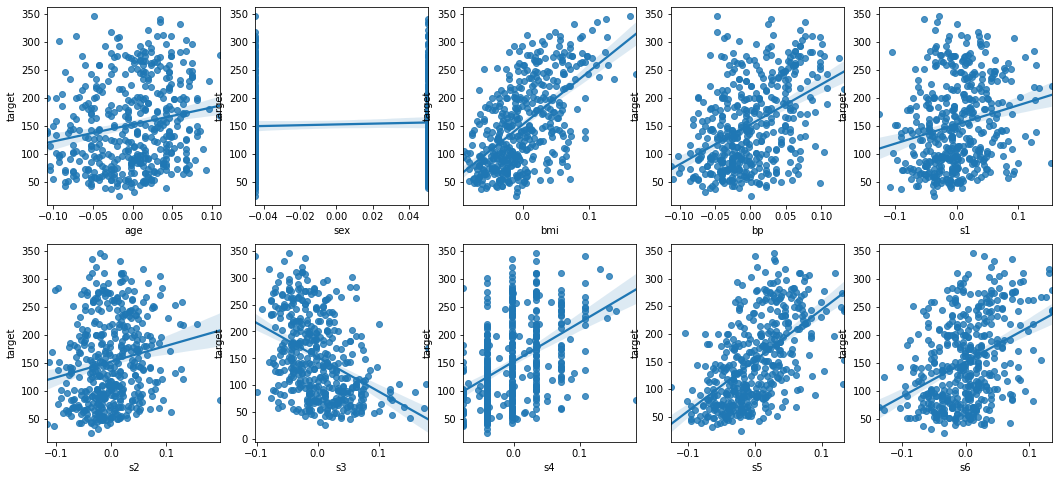

In [13]:
import seaborn as sns
_, axs = plt.subplots(nrows=2, ncols=5, figsize=(18,8))  #fig변수 안써서 언더바 처리 
for i, feature in enumerate(df.columns[:-1]):
    row, col = i//5, i%5
    sns.regplot(x=feature, y='target', data=df, ax=axs[row][col])

BMI vs target, BP vs target

In [14]:
# 일단은 훈련셋 테스트셋 구분않하고 계산하려함. 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [15]:
# BMI vs target
lr.fit(df.bmi.values.reshape(-1,1), diabetes.target)
lr.score(df.bmi.values.reshape(-1,1), diabetes.target)

0.3439237602253803

In [17]:
# BP vs target
lr.fit(df.bp.values.reshape(-1,1), diabetes.target)
lr.score(df.bp.values.reshape(-1,1), diabetes.target)

0.19490798886682947

In [18]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [19]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

### BMI vs target

- 훈련 / 테스트 데이터셋 분리 (test_size=0.1)

In [98]:
# 스트래티파이 옵션 없는것 체크 y값의 분포가 스트래티파이 할 필요가 없어. 분포가 균일할 필요 없어. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.bmi.values.reshape(-1,1), diabetes.target, test_size=0.1, random_state=2021
)
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((397, 1), (45, 1), (45,), (397,))

In [99]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [100]:
lr.coef_, lr.intercept_, lr._residues
#

(array([977.81113753]), 152.28695031603942, 1559426.1877638428)

In [101]:
from sklearn.metrics import r2_score
pred = lr.predict(X_test)
r2_score(y_test, pred)

0.17874580965139086

In [102]:
lr.score(X_test, y_test)

0.17874580965139086

In [103]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
mse, rmse

(3577.1382963531237, 59.809182374892266)

* 시각화

In [104]:
y_test[0], pred[0]  # 이부분은 왜 보는 것일까?

(155.0, 145.16480259305965)

In [105]:
# # 스트래티파이 옵션 없는것 체크 y값의 분포가 스트래티파이 할 필요가 없어. 분포가 균일할 필요 없어. 
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_test, y_train = train_test_split(
#     df.bp.values.reshape(-1,1), diabetes.target, test_size=0.1, random_state=2021
# )
# X_train.shape, X_test.shape, y_test.shape, y_train.shape

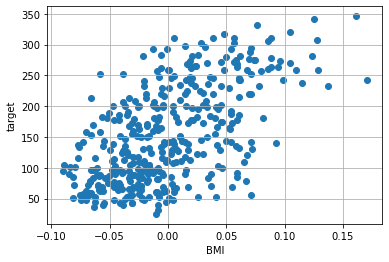

In [106]:
plt.scatter(X_train, y_train)

plt.grid()
plt.xlabel('BMI')
plt.ylabel('target')
plt.show()

# 회귀식그리기

In [107]:
# 회귀식 그리기

In [108]:
# xs = df.bmi.values   # 다만 x 값 지정이 잘 되었는지 의문. 
xs = np.array([-0.1, 0.18])
# ys = xs * weight + bias
ys = xs * lr.coef_ + lr.intercept_
ys

array([ 54.50583656, 328.29295507])

In [109]:

# weight, bias = np.polyfit(df.bmi, df.target, 1)  # 기울기 , 바이어스 , 1차식 
# weight, bias

In [110]:
# # xs 구하려면 
# df.bmi.min()
# df.bmi.max()
# df.bmi.values

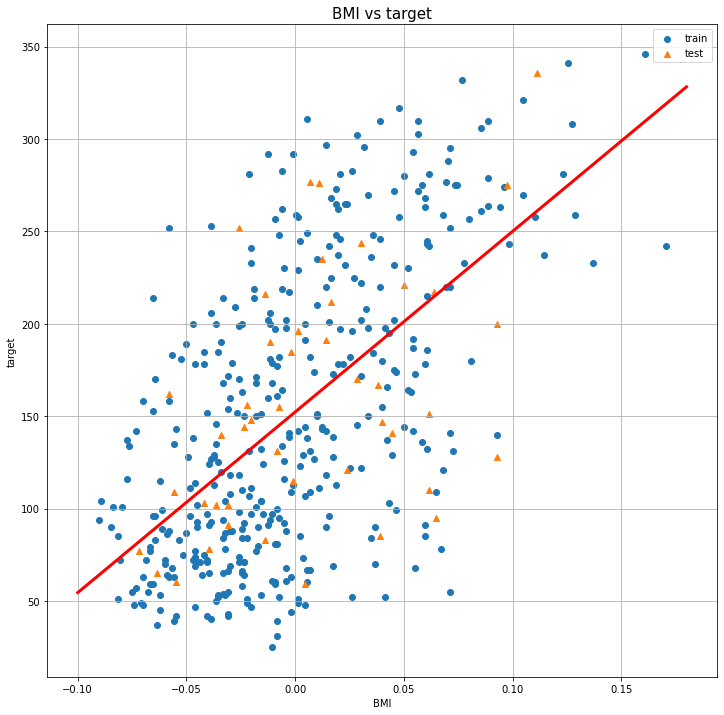

In [111]:
plt.figure(figsize=(12,12))  # 이게 위로 가야 되네??
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, marker='^', label='test')
# plt.scatter(X_test, pred, marker='s', label='pred') 의미없는값 빼기 그려봐야 회귀선이라서 

plt.plot(xs, ys, 'r-', lw=3)
plt.grid()
plt.xlabel('BMI')
plt.ylabel('target')
plt.title('BMI vs target', fontsize=15)
plt.legend()   # 범례

plt.show() 


### 
* ##외우기 np.polyfit(df.Father, df.Son, 2)    # 파라메터 x값, y값 1차식으로 

### BP vs target

* 훈련 데타셋 나누기

In [86]:
# 스트래티파이 옵션 없는것 체크 y값의 분포가 스트래티파이 할 필요가 없어. 분포가 균일할 필요 없어. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.bp.values.reshape(-1,1), diabetes.target, test_size=0.1, random_state=2021
)
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((397, 1), (45, 1), (45,), (397,))

* 학습도 하고

In [87]:
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

LinearRegression()

In [88]:
# (array([977.81113753]), 152.28695031603942, 1559426.1877638428) lr의 기울기 절편, 오차제곱

* lr2 = LinearRegression() 하고 필요한 값들 부를수 있어
* 기울기 절편, 오차??

In [89]:
lr2.coef_, lr2.intercept_, lr2._residues
#

(array([721.61788968]), 151.20147738352864, 1958279.8476122327)

In [90]:
from sklearn.metrics import r2_score
pred = lr2.predict(X_test)
r2_score(y_test, pred)

0.22296036461624136

* 평가 점수는요?

In [91]:
lr2.score(X_test, y_test)

0.22296036461624136

In [92]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
mse, rmse
# lr1일 때 (3577.1382963531237, 59.809182374892266)  lr1은 BMI
# lr2 (3384.5528828725055, 58.17691022108776) 조금 변화. 

(3384.5528828725055, 58.17691022108776)

In [93]:
# xs 값 설정하고자. 
# df.bp.min()  # -0.112399602060758
# df.bp.max()  # 0.132044217194516

* 선형관계 그리기

In [94]:
xs = np.array([ -0.11, 0.13])
# ys = xs * weight + bias
ys = xs * lr2.coef_ + lr2.intercept_
ys


array([ 71.82350952, 245.01180304])

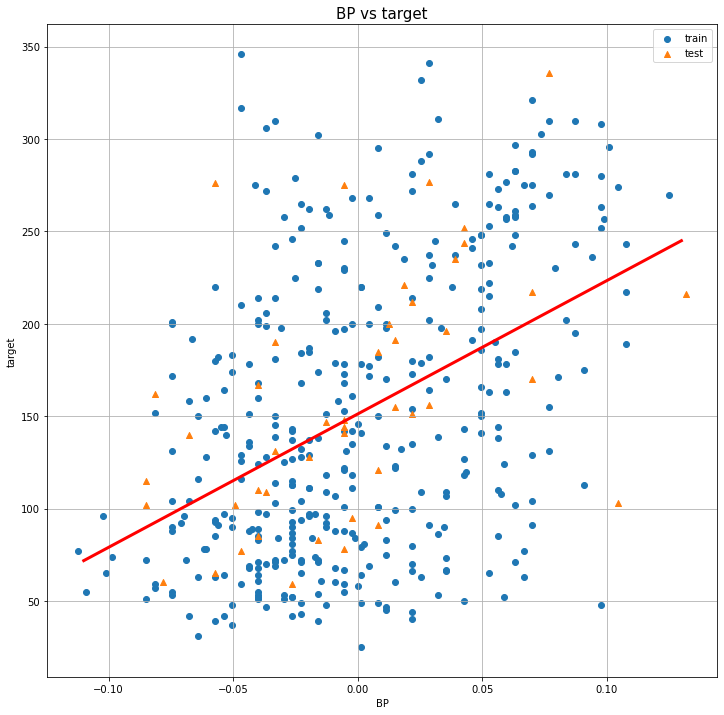

In [97]:
plt.figure(figsize=(12,12))  # 이게 위로 가야 되네??
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, marker='^', label='test')
# plt.scatter(X_test, pred, marker='s', label='pred') 의미없는값 빼기 그려봐야 회귀선이라서 

plt.plot(xs, ys, 'r-', lw=3)
plt.grid()
plt.xlabel('BP')
plt.ylabel('target')
plt.title('BP vs target', fontsize=15)
plt.legend()   # 범례

plt.show() 

### 경사 하강법 설명 중 콘트롤 
### 러닝레이트, 에포크, 러닝레이트를 컨츄롤 하는 뭔가가 추가. 프로그램 복잡해져.

경사하강법 학습률(러닝레이트), 나중에 딥러닝에 또 나와 

이제 다중회귀 해야되. 그 전에 보스턴 주택 가격 .
리니어 리그레션 클래스 입력 파라미터 안써도 상관없어. 인터셉션과 노말라이즈. 
우리는 노말라이즈 돌리기전에 . 코이피션트, 인터셉트 그러니까 기울기와 절편값 .. 그래프 그려야지 

attribute 값인 친구들 확인. 
* coef_ 
* intercept_  
속성값인 친구들 불러서 사용하는 방법

# 훠궈 평가 지표

- 

그리드 서치 시브이에서 스코어링에 = 네거티브 민 스퀘어드 에러 라고 써줘야 하는데 
왜냐면 negative_mean_ ???

정확도는 큰게 좋은데, mse는 작을 수록 좋아서.  스코어링을 클수록 좋다고 판단하여. MSE를 스코어링으로 사용하려면 - 붙여서 사용해야함



MSE. R^2 정도 기억하면 좋을것.. (MAE, MSE, RMSE 한 통속이라 볼 필요도 없지. 다만 RMSE를 쓰면 너무큰값의 오차함수를 정규화 처럼 특정 값안에서 축소해서 볼 수 있을 것. )

반면 R^2 은 분산 기반으로 예측 성능 평가. 1에 가까울 수록 예측 정확도 높은데.

 예측값 variance(분산) 
 실제값 variance(분산)   근데 실제값에서 분산을 구한다는게 잘 와닿지 않아.  
예측값 분산 / 실제값 분산   : 식은 되게 쉽다... 1에 가까울 수록 예측 정확도가 높다는 정도만 하면. 나머지는 멍청이콤퓨타가 다해.


사이킷 런